## Finding Compatible Components

We will construct a "component interaction network," where each node represents a component and a pair of components are connected by an edge if they are compatible. As an example, we will construct the following network:
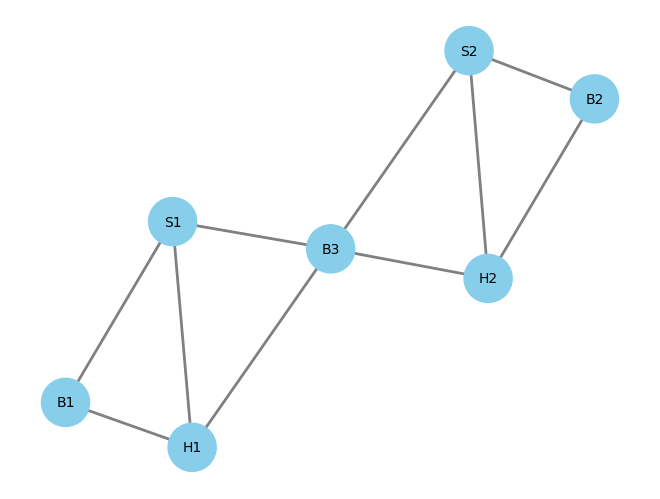

A set of nodes that are all adjacent to eachother is referred as a **clique**. Thus, we will look for cliques in this network.


#### Step 1: Create boolean variables for each component


Where S1 is a small shaft, S2 is a large shaft, B1 is a bearing that fits
small shaft, B2 is a bearing that fits large shaft, B3 is a universal bearing,
H1 is a housing that fits B1 and B3, H2 is a housing that fits B2 and B3.

In [ ]:
S1, S2, B1, B2, B3, H1, H2 = Bools("S1 S2 B1 B2 B3 H1 H2")
components = [S1, S2, B1, B2, B3, H1, H2]

#### Step 2: Define the interactions among components

In [ ]:
# We'll only list the positive interactions
interactions = {
    (S1, B1), (S1, B3), (S1, H1),
    (S2, B2), (S2, B3), (S2, H2),
    (B1, H1), (B3, H1), (B3, H2), (B2, H2)
}

#### We have defined a function to visualize the component interactions:

In [ ]:
visualize_compatible_components( interactions )

#### Step 3: Set size of clique

In [ ]:
k = 3 # size of the clique to find

#### Step 4: Set up Z3 solver

In [ ]:
s = Solver()

#### Step 5: Add constraints: if two components are selected, they must be compatible
For every unordered component pair $C1$ and $C2$ that are NOT compatible, add the constraint $ \neg (C1 \land C2) $, i.e., we can not select both $C1$ and $C2$ in our clique.

In [ ]:
# Shaft–Bearing
s.add( Not( And( S1, B2 ) ) ) # S1 and B2 do not interact, so we cannot select them both
s.add( Not( And( S2, B1 ) ) )

# Shaft–Housing
s.add( Not( And( S1, H2 ) ) )
s.add( Not( And( S2, H1 ) ) )

# Bearing–Housing
s.add( Not( And( B1, H2 ) ) )
s.add( Not( And( B2, H1 ) ) )

# Shaft–Shaft
s.add( Not( And( S1, S2 ) ) )

# Bearing–Bearing
s.add( Not( And( B1, B2 ) ) )
s.add( Not( And( B1, B3 ) ) )
s.add( Not( And( B2, B3 ) ) )

# Housing–Housing
s.add( Not( And( H1, H2 ) ) )

#### Step 6: Add constraints: select at least $k$ components

In [ ]:
s.add( S1 + S2 + B1 + B2 + B3 + H1 + H2 >= k )

#### Step 7: Check solution

In [ ]:
# Check if solution exists
print( s.check() )

In [ ]:
# View solution
solution = s.model()
print( solution )


We have also defined a function to visualize the solution:

In [ ]:
visualize_compatible_components_solution( interactions, solution )